In [1]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Arrest_Data_from_2010_to_Present.csv')

In [3]:
print(df.shape)
df.head()

(1310127, 17)


,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,4248313,02/24/2015,1310.0,20,Olympic,2022,37,M,H,5.0,Burglary,F,459PC,BURGLARY,5TH,WILTON,"(34.0653, -118.314)"
1,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
2,4254777,02/26/2015,2010.0,19,Mission,1985,22,M,H,6.0,Larceny,M,459.5PC,SHOPLIFTING,8300 VAN NUYS BL,NaN,"(34.2216, -118.4488)"
3,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
4,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"


In [4]:
df.columns

Index(['Report ID', 'Arrest Date', 'Time', 'Area ID', 'Area Name',
       'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location'],
      dtype='object')

In [5]:
df["Arrest Date"] = pd.to_datetime(df['Arrest Date'])

In [6]:
df_2018 = df[(df['Arrest Date'] > '2017-12-31')&(df['Arrest Date'] < "2019-01-01")]

In [7]:
df_2018.shape[0]

104277

In [8]:
df_2018['Area ID'].value_counts()

1     10951
6      9715
2      7345
14     6778
12     6259
9      6193
3      5927
13     5427
15     4947
19     4357
20     3898
5      3875
18     3601
4      3590
10     3562
11     3452
17     3146
21     3094
16     3006
8      2687
7      2467
Name: Area ID, dtype: int64

In [9]:
set(list(df_2018['Charge Group Description'].values))

{nan,
 'Gambling',
 'Federal Offenses',
 'Aggravated Assault',
 'Forgery/Counterfeit',
 'Liquor Laws',
 'Pre-Delinquency',
 'Prostitution/Allied',
 'Narcotic Drug Laws',
 'Sex (except rape/prst)',
 'Fraud/Embezzlement',
 'Against Family/Child',
 'Homicide',
 'Receive Stolen Property',
 'Robbery',
 'Burglary',
 'Disorderly Conduct',
 'Vehicle Theft',
 'Non-Criminal Detention',
 'Moving Traffic Violations',
 'Rape',
 'Miscellaneous Other Violations',
 'Weapon (carry/poss)',
 'Driving Under Influence',
 'Disturbing the Peace',
 'Other Assaults',
 'Drunkeness',
 'Larceny'}

In [10]:
VRBR = {'Vehicle Theft', 'Burglary','Robbery','Receive Stolen Property'}

In [11]:
df_2018[df_2018['Charge Group Description'].isin(VRBR)]['Age'].quantile(0.95)

52.0

In [12]:
from scipy.stats import zscore

In [13]:
average_ages = df_2018.groupby('Charge Group Description')['Age'].mean()

In [14]:
adult_ages = average_ages.loc[~average_ages.index.isin(["Pre-Delinquency", "Non-Criminal Detention"])]

In [15]:
np.abs((adult_ages - adult_ages.mean())/adult_ages.std()).max()

2.1278699344353633

In [16]:
df['year'] = pd.DatetimeIndex(df['Arrest Date']).year

In [17]:
df.year.unique()

array([2015, 2019, 2016, 2017, 2018, 2012, 2014, 2010, 2011, 2013],
      dtype=int64)

In [18]:
felony_df = df[df['Arrest Type Code'] == 'F']

In [19]:
yearly_counts = felony_df.year.value_counts()[~felony_df.year.value_counts().index.isin(['2019'])].sort_index()

In [20]:
from sklearn.linear_model import LinearRegression

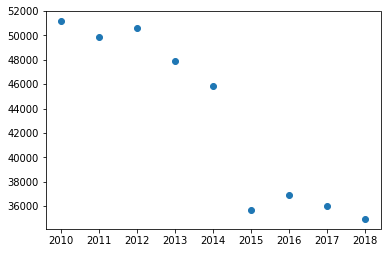

In [21]:
plt.plot(yearly_counts, "o")
plt.show()

In [22]:
np.array(yearly_counts)

array([51157, 49830, 50610, 47882, 45878, 35709, 36880, 35974, 34948],
      dtype=int64)

In [23]:
regressor = LinearRegression()
regressor.fit(np.array(yearly_counts.index).reshape(-1, 1), np.array(yearly_counts).reshape(-1, 1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
regressor.coef_

array([[-2433.95]])

In [25]:
regressor.predict(np.array([2019]).reshape(-1,1))

array([[31037.80555556]])

In [26]:
df_2018.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
165,5213460,2018-01-24,1930.0,6,Hollywood,668,29,M,H,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,ST ANDREWS,FOUNTAIN,"(34.0949, -118.3109)"
166,5257944,2018-03-15,310.0,7,Wilshire,743,33,F,O,1.0,Homicide,F,191.5(B)PC,VEH MANSLAUGHTR/OPER VESSEL DUI & DUR FEL,OLYMPIC,MASSELIN,"(34.0574, -118.3547)"
167,5328813,2018-06-01,1800.0,3,Southwest,356,44,F,B,16.0,Narcotic Drug Laws,F,11379(A)HS,TRANSPORT/SELL CONTROLLED SUBSTANCE,1600 W 36TH PL,NaN,"(34.0219, -118.3061)"
168,5336331,2018-06-10,200.0,13,Newton,1364,23,M,H,12.0,Weapon (carry/poss),F,25400(A)2PC,CARRYING CONCEALED WEAPON UPON PERSON,1200 E 50TH ST,NaN,"(33.998, -118.2543)"
169,5360731,2018-07-07,2330.0,18,Southeast,1832,32,M,B,12.0,Weapon (carry/poss),F,29800(A)1PC,POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,10700 S MAIN ST,NaN,"(33.9392, -118.2739)"


In [27]:
import math

In [28]:
cosine = math.cos(34.050536/180 * math.pi)
thresh = (2/6371)**2
def dist_sqr(loc):
    
    return ((loc[0] - 34.050536)/180*math.pi)**2 + (cosine*(loc[1] + 118.247861)/180*math.pi)**2 <= thresh

In [29]:
df_2018['Location'] = df_2018.Location.apply(eval)

C:\Users\Zhongyi Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
dist_sqr(df_2018.Location.iloc[0])

False

In [31]:
df_2018[df_2018.Location.apply(dist_sqr)].shape[0]

11461

In [32]:
def on_Pico(x):
    return "PICO" in x

In [33]:
Pico_2018 = df_2018[df_2018['Address'].apply(lambda x: "PICO" in x)]

In [34]:
plongitude, platitude = Pico_2018.Location.apply(lambda x: x[1]), Pico_2018.Location.apply(lambda x: x[0])

In [35]:
long_reasonable = plongitude.apply(lambda x: x<= plongitude.mean() + 2*plongitude.std() and x>=plongitude.mean() - 2*plongitude.std())

In [36]:
lat_reasonable = platitude.apply(lambda x: x<=platitude.mean() + 2*platitude.std() and x>= platitude.mean() - 2*platitude.std())

In [37]:
Pico_valid = Pico_2018[long_reasonable & lat_reasonable]

In [38]:
lat_delta = Pico_valid.Location.apply(lambda x: x[0]).max() - Pico_valid.Location.apply(lambda x: x[0]).min()

In [39]:
long_delta = Pico_valid.Location.apply(lambda x: x[1]).max() - Pico_valid.Location.apply(lambda x: x[1]).min()

In [40]:
lat_delta

0.039500000000003865

In [41]:
long_delta

0.2370999999999981

In [42]:
Pico_valid.shape[0]/ (6371*np.sqrt((long_delta/180*math.pi* math.cos(lat_reasonable.mean()/180 *math.pi))**2 + (lat_delta/180*math.pi)**2))

22.638981280063835

6371*np.sqrt((long_delta/180*math.pi* math.cos(lat_reasonable.mean()/180 *math.pi))**2 + (lat_delta/180*math.pi)**2)

In [43]:
before_19 = df[df['Arrest Date']<"2019-01-01"]

pd.Series(df['Charge Group Code'].unique()).dropna()

In [44]:
sorted(df['Area ID'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [46]:
ratio = []
for charge_code in pd.Series(df['Charge Group Code'].unique()).dropna():
    if charge_code >=80:
        continue
    charge_df = before_19[before_19['Charge Group Code']==charge_code]
    charge_code_rate = charge_df.shape[0]/before_19.shape[0]
    for area in df['Area ID'].unique():
        area_charge_df = charge_df[charge_df['Area ID']== area]
        ratio.append((area_charge_df.shape[0]/before_19[before_19['Area ID'] == area].shape[0])/charge_code_rate)
ratio.sort()

        
    

In [47]:
np.mean(ratio[-5:])

3.554080494962799

### Section 2

In [48]:
def next_steps(loc,n):
    res = []
    for d in range(len(loc)):
        if loc[d] >0:
            res.append(loc[:d]+(loc[d] - 1,) + loc[d+1:])
        if loc[d]< n -1:
            res.append(loc[:d]+ (loc[d] + 1,)+ loc[d+1:])
    return res

In [50]:
next_steps((0,1,0,3), 4)

[(1, 1, 0, 3), (0, 0, 0, 3), (0, 2, 0, 3), (0, 1, 1, 3), (0, 1, 0, 2)]

In [52]:
import collections
next_steps_dic = collections.defaultdict()
m = 10
for a in range(m):
    for b in range(m):
        for c in range(m):
            for d in range(m):
                next_steps_dic[(a,b,c,d)]= next_steps((a,b,c,d), 10)
        
    

def num_of_steps(start,n, m):
    
    if m==0: return 1
    return sum(num_of_steps(next_step,n, m-1) for next_step in next_steps_dic[start])
        

In [53]:
def num_of_steps(start,m):
    steps_list = [{start: 1}]
    
    if m ==0: return 1
    #if m ==1: return len(next_steps_dic[start])
    for step in range(1,m + 1):
        steps_and_loc_dic = collections.defaultdict()
        #if step ==1:
            ##for loc in next_steps_dic.keys():
                ##steps_and_loc_dic[(step,loc)] = 1 if loc in next_steps_dic[start] else 0
            #for loc in next_steps_dic[start]:
                #steps_and_loc_dic[(step, loc)] = 1
       
        for prev_loc in steps_list[step-1].keys():
            for this_loc in next_steps_dic[prev_loc]:
                steps_and_loc_dic[this_loc] = steps_list[step -1][prev_loc] if this_loc not in steps_and_loc_dic else steps_and_loc_dic[this_loc]+ steps_list[step -1][prev_loc]
        steps_list.append(steps_and_loc_dic)
    #print(steps_list)
    return sum(steps_list[-1].values())

In [64]:
next_steps_dic2[(0,2,5,0,0,0,0,1)]

[(1, 2, 5, 0, 0, 0, 0, 1),
 (0, 1, 5, 0, 0, 0, 0, 1),
 (0, 3, 5, 0, 0, 0, 0, 1),
 (0, 2, 4, 0, 0, 0, 0, 1),
 (0, 2, 6, 0, 0, 0, 0, 1),
 (0, 2, 5, 1, 0, 0, 0, 1),
 (0, 2, 5, 0, 1, 0, 0, 1),
 (0, 2, 5, 0, 0, 1, 0, 1),
 (0, 2, 5, 0, 0, 0, 1, 1),
 (0, 2, 5, 0, 0, 0, 0, 0),
 (0, 2, 5, 0, 0, 0, 0, 2)]

In [57]:
def occurance(loc):
    j,k = loc[1], loc[2]
    if len(set(loc)) ==4:
        return 24
    elif len(set(loc)) == 3:
        return 12
    elif len(set(loc)) ==2:
        if j==k:
            return 4
        else: return 6
    else: return 1
        

In [58]:
n = 10
steps = []
for i in range(n//2):
    for j in range(i+ 1):
        for k in range(j+1):
            for l in range(k+1):
                steps.append([(i,j,k,l), num_of_steps((i,j,k,l), 10), occurance((i,j,k,l))])
                

In [59]:

max(cnt for loc, cnt, _ in steps)/min(cnt for loc, cnt, _ in steps)
    

23.81209118548726

In [60]:
mean = sum(cnt * occ for loc, cnt, occ in steps)/sum(occ for loc, cnt, occ in steps)

In [61]:
std = np.sqrt(sum((cnt- mean)**2 * occ for loc, cnt, occ in steps)/sum(occ for loc, cnt, occ in steps))

In [62]:
std/mean

0.5106573744484553

In [ ]:
next_steps_1_d = []

In [21]:
def num_of_steps_1_d(start, total_step, n):
    next_step = [{start:1}]
    for step in range(1,total_step +1):
        this_step_dic = {}
        for prev_loc in next_step[step -1]:
            if prev_loc>=1:
                this_step_dic[prev_loc -1] = this_step_dic.get(prev_loc -1, 0)+ next_step[step-1][prev_loc]
            if prev_loc< n -1:
                this_step_dic[prev_loc +1] = this_step_dic.get(prev_loc + 1, 0)+ next_step[step-1][prev_loc]
        next_step.append(this_step_dic)
    #print(next_step)
    return sum(next_step[-1].values())

In [20]:
num_of_steps_1_d(1,4 , 5)

[{1: 1}, {0: 1, 2: 1}, {1: 2, 3: 1}, {0: 2, 2: 3, 4: 1}, {1: 5, 3: 4}]


9

In [30]:
   
steps_dict = {}
for start in range(12):
    for total_step in range(0,13):
        steps_dict[(start, total_step)] = num_of_steps_1_d(start, total_step, 12)


In [35]:
steps_dict[(5, 12)]


3560

In [36]:
math.factorial(0)

1

In [3]:
fac12 = math.factorial(12)

In [38]:
def num_of_steps_8d(start):
    
    cnt_so_far = 0
    coef0= fac12
    for a1 in range(12):
        coef1 = coef0* steps_dict[(start[0], a1)]/math.factorial(a1)
        for a2 in range(12 - a1):
            sum_sofar2 = a1 + a2
            coef2 = coef1*steps_dict[(start[1], a2)]/ math.factorial(a2)
            for a3 in range(12- sum_sofar2):
                sum_sofar3= a3 + sum_sofar2
                coef3 = coef2*steps_dict[(start[2], a3)]/ math.factorial(a3)
                for a4 in range(12 - sum_sofar3):
                    sum_sofar4 = a4 + sum_sofar3
                    coef4 = coef3*steps_dict[(start[3], a4)]/ math.factorial(a4)
                    for a5 in range(12 - sum_sofar4):
                        sum_sofar5 = a5 + sum_sofar4
                        coef5 = coef4*steps_dict[(start[4], a5)]/ math.factorial(a5)
                        for a6 in range(12 - sum_sofar5):
                            sum_sofar6 = a6 + sum_sofar5
                            coef6 = coef5*steps_dict[(start[5], a6)]/ math.factorial(a6)
                            for a7 in range(12 - sum_sofar6):
                                sum_sofar7 = a7 + sum_sofar6
                                coef7 = coef6*steps_dict[(start[6], a7)]/ math.factorial(a7)
                                a8 = 12 - sum_sofar7
                                cnt_so_far += coef7*steps_dict[(start[7], a8)]/math.factorial(a8)
    return cnt_so_far
                                    
                                    
        
        

In [39]:
num_of_steps_8d((0,0,0,0,0,0,0,0))

1843298823827.0

In [41]:
num_of_steps_8d(tuple([5]*8))

224737601066556.0

In [42]:
num_of_steps_8d(tuple([5]*8))/num_of_steps_8d(tuple([0]*8))

121.92141510727096

In [66]:
total_steps_by_starting_point = {}
for a in range(6):
    for b in range(a, 6):
        for c in range(b, 6):
            for d in range(c, 6):
                for e in range(d, 6):
                    for f in range(e, 6):
                        for g in range(f,6):
                            for h in range(g, 6):
                                starting_point = (a, b, c, d, e, f, g, h)
                                cnt = collections.Counter(starting_point)
                                total_steps_by_starting_point[starting_point] = [num_of_steps_8d(starting_point), math.factorial(8) /np.product([math.factorial(val) for val in cnt.values()])]
    

In [71]:
sum_cnt = 0
start_cnt = 0
var = 0
for key in total_steps_by_starting_point.keys():
    #sum_cnt += total_steps_by_starting_point[key][0]*total_steps_by_starting_point[key][1]
    start_cnt += total_steps_by_starting_point[key][1]
    var += (total_steps_by_starting_point[key][0]- mean)**2 * total_steps_by_starting_point[key][1]
print(start_cnt)
mean = sum_cnt/start_cnt
np
    

1679616.0


In [72]:
std

1679616

In [69]:
list(total_steps_by_starting_point.keys())[150:158]

[(0, 0, 0, 1, 1, 2, 5, 5),
 (0, 0, 0, 1, 1, 3, 3, 3),
 (0, 0, 0, 1, 1, 3, 3, 4),
 (0, 0, 0, 1, 1, 3, 3, 5),
 (0, 0, 0, 1, 1, 3, 4, 4),
 (0, 0, 0, 1, 1, 3, 4, 5),
 (0, 0, 0, 1, 1, 3, 5, 5),
 (0, 0, 0, 1, 1, 4, 4, 4)]

In [63]:
import collections
import numpy as np
cnt = collections.Counter((1,2 ,3,3,4, 4, 4, 5))

In [53]:
np.cumprod(cnt.values())

array([dict_values([1, 1, 2, 1])], dtype=object)

In [64]:
np.product([math.factorial(val) for val in cnt.values()])

12

In [69]:
def ref(i, N):
    
    return N - i - 1 if i > N/2 else i
    
def reflect(loc,N):
    return tuple([ref(loc[i],N ) for i in range(len(loc))])

N = 12
n = 6
next_steps_dic2 = collections.defaultdict()
for a1 in range(n):
    for a2 in range(n):
        for a3 in range(n):
            for a4 in range(n):
                for a5 in range(n):
                    for a6 in range(n):
                        for a7 in range(n):
                            for a8 in range(n):
                                loc = (a1, a2, a3, a4, a5, a6, a7, a8)
                                next_steps_dic2[loc] = next_steps(loc, N)

In [70]:
reflect((1,2,4,8, 9, 11, 7, 2), 12)

(1, 2, 4, 3, 2, 0, 4, 2)

def num_of_steps2(start, m):    
    steps_list = [{start:1}]
    for step in range(1, m+1):
        steps_and_loc_dic2 = collections.defaultdict()
        for prev_loc in steps_list[step - 1].keys():
            for this_loc in next_steps_dic[prev_loc]:
                this_loc = reflect(this_loc)
                steps_and_loc_dic2[this_loc] = steps_and_loc_dic2.get(this_loc, 0) + steps_list[step -1][prev_loc]
        steps_list.append(steps_and_loc_dic2)
        
        
        
    return sum(steps_list[-1].values())

In [79]:
num_of_steps_try((5,5), 2)

[{(5, 5): 1}, defaultdict(None, {(4, 5): 1, (6, 5): 1, (5, 4): 1, (5, 6): 1})]


KeyError: (6, 5)

next_step_try = collections.defaultdict()
for i in range(6):
    for j in range(6):
        next_step_try[(i,j)] = next_steps((i,j), 12)

def num_of_steps_try(start, m):
    steps_list = [{start:1}]
    for step in range(1, m+1):
        steps_and_loc_dic_try = collections.defaultdict()
        for prev_loc in steps_list[step - 1].keys():
            for this_loc in next_step_try[prev_loc]:
                this_loc = reflect(this_loc, 12)
                steps_and_loc_dic_try[this_loc] = steps_and_loc_dic_try.get(this_loc, 0) + steps_list[step -1][prev_loc]
        steps_list.append(steps_and_loc_dic_try)
    print(steps_list)
    return sum(steps_list[-1].values())

In [55]:
num_of_steps((0,0,0,0), 10)

44569724

In [56]:
num_of_steps((5,5,5,5), 10)

1061298332

sum({next_step:1 for next_step in next_steps_dic[(1,2,3,4)]}.values())

dicA = collections.defaultdict()
for loc in next_steps_dic[(1,2,3,4)]:
    dicA[(1,loc)] = 1
list(dicA.keys())
dicA[(7,8,9,5)] = dicA.get((7,8,9,10), 0) + 1
dicA

In [266]:
len(next_steps_dic[(1,2,3,4)])

8

In [249]:
1061298332/44569724

23.81209118548726

In [302]:
occurance((2,3,4,4))

12